In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

### 3. Dimensionality Reduction

In [10]:
data = pd.read_csv('data/combined_data_fs.csv')

In [11]:
data

,Month,APOE,MMSE,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,xu.S6OENiSSCDruXFc,xu3n8ix_RpCpNPRKhc,xuBm5ckgidWRNTl.gQ,xuNOUeR1JerhIuIV7c,xud4v2r3nXECBua55o,xvHfVEL1fC35XJ7neU,xve7nuGHtAizelOmhE,xvrrv4q_nIDgJej.uU,xws9e3UChad1OnXmXY,Diagnosis
0,0,0,0.583333,-0.0824,-0.0177,-0.0168,-0.0129,0.0226,-22.0000,-0.0861,...,0.638885,0.865034,0.739862,0.925495,0.677866,0.838153,0.665292,0.649081,0.693293,0
1,3,0,0.416667,-0.0824,-0.0177,-0.0168,-0.0129,0.0226,-22.0000,-0.0861,...,0.638885,0.865034,0.739862,0.925495,0.677866,0.838153,0.665292,0.649081,0.693293,0
2,12,0,0.625000,-0.0824,-0.0177,-0.0168,-0.0129,0.0226,-22.0000,-0.0861,...,0.638885,0.865034,0.739862,0.925495,0.677866,0.838153,0.665292,0.649081,0.693293,0
3,0,0,0.833333,-0.0858,-0.0128,-0.0204,-0.0074,0.0001,-0.0461,0.0009,...,0.700966,0.777064,0.680335,0.828906,0.895631,0.929776,0.780032,0.607193,0.826743,0
4,3,0,0.791667,-0.0858,-0.0128,-0.0204,-0.0074,0.0001,-0.0461,0.0009,...,0.700966,0.777064,0.680335,0.828906,0.895631,0.929776,0.780032,0.607193,0.826743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2,0.916667,0.0135,-0.0574,-0.0044,-2.0000,0.0141,-0.0033,-0.0299,...,0.628193,0.935638,0.576219,0.826243,0.851986,0.936146,0.710167,0.549367,0.751225,2
610,6,1,0.796355,0.0135,-0.0574,-0.0044,-2.0000,0.0141,-0.0033,-0.0299,...,0.628193,0.935638,0.576219,0.826243,0.851986,0.936146,0.710167,0.549367,0.751225,2
611,0,1,0.958333,0.0011,-0.0498,0.0126,0.0303,0.0014,-4.0000,-12.0000,...,0.623643,0.912389,0.741199,0.843128,0.824156,0.778257,0.709999,0.510799,0.848757,2
612,6,1,0.796355,0.0011,-0.0498,0.0126,0.0303,0.0014,-4.0000,-12.0000,...,0.623643,0.912389,0.741199,0.843128,0.824156,0.778257,0.709999,0.510799,0.848757,2


In [12]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
clf = make_pipeline(PCA(random_state = 42), RandomForestClassifier(random_state=42))
param_distrib = { "pca__n_components": np.arange(10, 80),
                    "randomforestclassifier__n_estimators": np.arange(50, 500)}
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state = 73)
rnd_search.fit(X_train[:10000], y_train[:10000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=73)

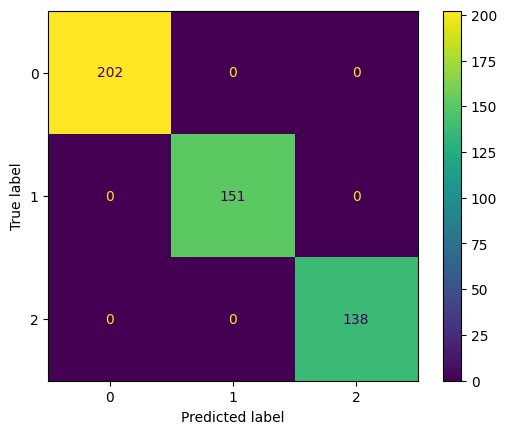

In [14]:
y_pred = rnd_search.predict((X_train))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

In [15]:
rnd_search.best_params_

{'randomforestclassifier__n_estimators': 192, 'pca__n_components': 56}

In [16]:
from sklearn.decomposition import FastICA

# Applying ICA
ica = FastICA(n_components=2, random_state=0)  # Using 2 components for visualization
independent_components = ica.fit_transform(data)

# Creating a DataFrame for the independent components
ica_df = pd.DataFrame(data=independent_components, columns=['Independent Component 1', 'Independent Component 2'])

# Adding back the diagnosis information for visualization
ica_df['Diagnosis'] = data['Diagnosis']

ica_df.head()


,Independent Component 1,Independent Component 2,Diagnosis
0,0.044861,0.021382,0
1,0.044286,0.021245,0
2,0.042600,0.020880,0
3,0.021788,-0.013696,0
4,0.021282,-0.013850,0


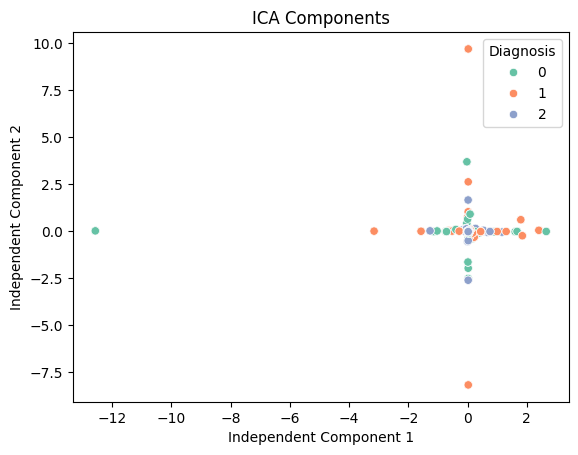

In [17]:
#plot the independent components
sns.scatterplot(data=ica_df, x='Independent Component 1', y='Independent Component 2', hue='Diagnosis', palette='Set2')
plt.title('ICA Components')
plt.show()

In [24]:
from sklearn.decomposition import FastICA
from sklearn.metrics import mutual_info_score
import numpy as np
import matplotlib.pyplot as plt


def average_mutual_information(components):
    n = components.shape[1]
    total_mi = 0
    count = 0
    for i in range(n):
        for j in range(i + 1, n):
            mi = mutual_info_score(components[:, i], components[:, j])
            total_mi += mi
            count += 1
    return total_mi / count

components_range = range(2, 21)
mi_scores = []

from sklearn.preprocessing import KBinsDiscretizer

def discretize_components(components):
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=200000)
    return discretizer.fit_transform(components)

for n_components in components_range:
    ica = FastICA(n_components=n_components, random_state=0, max_iter=1000, tol=0.001)
    components = ica.fit_transform(data_subset)
    discrete_components = discretize_components(components)
    mi_score = average_mutual_information(discrete_components)
    mi_scores.append(mi_score)


/Users/salma/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/salma/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/salma/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/salma/anaconda3/envs/tensor/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/Users/salma/anaconda3/envs/tensor/lib/python3.10/site-packages/skle

In [25]:
mi_scores

[0.303799520918179,
 0.19655384737120263,
 0.12947174903793293,
 0.13204491067862975,
 0.14134596102763625,
 0.14582518169755315,
 0.14616707000239934,
 0.1468940549309884,
 0.14734023797050783,
 0.1430127229662496,
 0.12571499942274356,
 0.12470506769860489,
 0.12210710321303071,
 0.12673217382664032,
 0.11972607469881967,
 0.12018700405668274,
 0.11204547637726225,
 0.11616258211686933,
 0.10857647343492385]